Radioactive Decay Simulation
=====
# Barry O'Donnell

## 15/01/2020

In this assignment, we will be using the Monte-Carlo method to simulate radioactive atom decay and radiation shielding, and comparing it to theoretical results.

To do this, I will be defining a certain percentage chance that an atom will decay to daughter/grandaughter and using a `for` loop for every atom that we are currently observing to check if that atom will decay.

I will be working on a second-by-second system in **Task 1**  and **Task 2**, and an atom-by-atom system in **Task 3**  and **Task 4**.

For the comparison of theoretical half-life time, I will be using the following formula;
### $$ t_{\frac{1}{2}} = \frac{ln(2)}{\lambda} $$
This formula forms from;
### $$ exp(-\lambda t) = exp(\frac{-ln(2)t}{t_{\frac{1}{2}}}) $$

In [1]:
## Import neccesary modules for assignment
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## Define function to calculate the half-life of some radioactive source
def t_half(p):
    """
        This function takes in the probability 'p' a parent atom will decay to a daughter atom.
        Returns;
        float that represents time in seconds#
    """
        
    return np.log(2) / np.log((1-p)**-1)

## Task 1:
Here, we will be observing a standard decay of a radioactive parent atom into a stable daughter atom. We will be simulating this by using the Monte-Carlo method.

This is done by using a `for` loop to look at each parent atom, generating a positive random number **$<1$** using the `np.random.rand()` function, and comparing that number to the probability the atom decays (**$p$**). 

If the random number **$>p$**, it will not decay.

If it is **$<p$**, it will decay, and $1$ will be added to the total amount of daughter atoms.

Half-life occurs between  13s - 14s
Analytic half-life is       13.51s



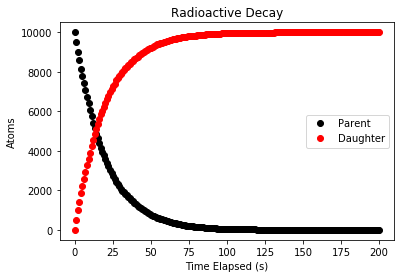

In [3]:
## Define variables to be called on later
##  'N0', 'D0' are initial atom counts for parent, daughter respectively 
N0 = 10000
D0 = 0

## 'n' is the timescale. Here, '200' means 200 seconds
n = 200

## Probability parent atom decays
p = 0.05

## Initialising time array and parent/daughter arrays, all equal in length
t = np.linspace(0, n, num=n)
Nt, Dt = np.zeros(n), np.zeros(n)
Nt[0], Dt[0] = N0, D0

## Begin 'for' loop for each second
for i in range(1, n):
    ## Starts count
    Dt[i], Nt[i] = Dt[i-1], Nt[i-1]
    
    ## Begin 'for' loop for each parent atom
    for j in range(int(Nt[i])):
        
        ## Checks if parent atom will become daughter atom and adds to daughter atom count
        if np.random.rand() <= p:
            Dt[i] += 1
            Nt[i] -= 1
            
        ## Checks if current count = 1/2 the initial parent atom amount
        if Dt[i] == N0//2:
            halfLife = i-1

## Displays for user the experimental half-life and the analytic half-life 
print("""Half-life occurs between  {0:2.0f}s - {1:2.0f}s
Analytic half-life is       {2:4.2f}s\n""".format(halfLife, halfLife + 1, t_half(p)))
    
## Begin plot definitions
plt.plot(t, Nt, 'ko', label='Parent')
plt.plot(t, Dt, 'ro', label='Daughter')
plt.title("Radioactive Decay")
plt.xlabel('Time Elapsed (s)')
plt.ylabel('Atoms')
plt.legend()
plt.show()

## Task 2:
Similar to `Task 1`, we will be observing radioactive decay of parent atoms, but now also daughter atoms.

Decayed daughter atoms are called 'grandaughter' atoms. This process is a copy of the parent -> daughter decay, and will be treated the same.

Maximum daughter atoms occurs at: 32s



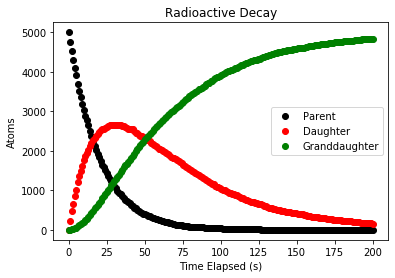

In [4]:
## Define variables to be called on later
##  'N0', 'D0', 'G0' are initial parent atom, daughter neutron, and granaughter neutron amount respectively
N0, D0, G0 = 5000, 0, 0
n = 200

## Probability parent decays to daughter, and daughter decays to grandaughter respectively
p_d = 0.05
p_g = 0.02

## Initialises arrays
t = np.linspace(0, n, num=n)
Nt, Dt, Gt = np.zeros(n), np.zeros(n), np.zeros(n)
Nt[0], Dt[0], Gt[0] = N0, D0, G0

## Begin 'for' loop for each second
for i in range(1, n):
    Nt[i], Dt[i], Gt[i] = Nt[i-1], Dt[i-1], Gt[i-1]
    
    ## Begin 'for' loop for each parent atom
    for j in range(int(Nt[i])):
        ## Checks if parent atom will become daughter atom and adds to daughter atom counter
        if np.random.rand() <= p_d:
            Nt[i] -= 1
            Dt[i] += 1
            
    ## Begin 'for' loop for each daughter atom
    for k in range(int(Dt[i])):
        ## Checks if daughter atom will become grandaughter atom and adds to grandaughter atom counter
        if np.random.rand() <= p_g:
            Dt[i] -= 1
            Gt[i] += 1

## Relays maximum daughter atoms achieved to user
print("Maximum daughter atoms occurs at: {}s\n".format(int(np.argmax(Dt))))

## Begins plot definitions
plt.plot(t, Nt, 'ko', label='Parent')
plt.plot(t, Dt, 'ro', label='Daughter')
plt.plot(t, Gt, 'go', label='Granddaughter')
plt.title("Radioactive Decay")
plt.xlabel('Time Elapsed (s)')
plt.ylabel('Atoms')
plt.legend()
plt.show()

## Task 3;
Here we observe the interaction between a neutrons produced from a nuclear reactor core and the reactor shield. We can consider this a 1-D problem if we observe it on a neutron scale.

As neutrons reach the shield, they will interact with atoms in the material, and have a chance to be absorbed by these atoms.

We can relate this absorption to the process we working with above, but rather than considering 'decaying', we instead consider 'absorption'.

Using the Monte-Carlo method, we can calculate the thickness of the wall needed to reduce the incident flux of neutrons to **$50$%**, and return this info to the user.

In [5]:
## Define variables to be called on later
##  'N0' is initioal neutron amount 
N0 = 5000

## 'n' is the thickness scale. Here, '200' means 200 atoms
n = 200

## Probability neutron is absorbed by the atoms
p = 0.03

## Initialising neutron array
Nt = np.zeros(n)
Nt[0] = N0

## Initialise wall-thickness. This stops from saving variables from previous 'Runs' messing with results
B_50 = None

## Begin 'for' loop for each second
for i in range(1, n):
    Nt[i] = Nt[i-1]
    
    ## Begin 'for' loop for each neutron
    for j in range(int(Nt[i])):
        
        ## Checks if neutron will be absorbed
        if np.random.rand() <= p:
            Nt[i] -= 1
            
        ## Checks if current count = 50% the initial neutron amount
        if Nt[i] == N0//2:
            B_50 = i
    
if B_50 is None:
    print("""50% of incident flux wasn't reached, try increasing thickness (n)""")
else:
    print("""50% of incident flux; {} atoms\n""".format(B_50))

50% of incident flux; 23 atoms



## Task 4;

Similar to `Task 3`, we will be observing absorption. This time we will be varying the thickness **$B$** and comparing it to the fraction of neutrons left through.

We will also return to the user the amount of atoms thick the wall needs to be to let through **$50$%** and **$1$%** of the incident flux.

50% of incident flux;  23 atoms
1%  of incident flux; 151 atoms



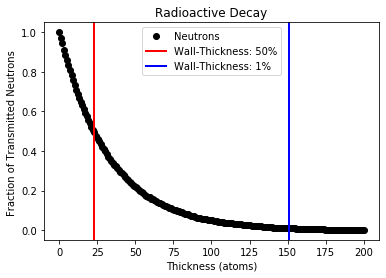

In [6]:
## Define variables to be called on later
##  'N0' is initial atom counts for parent 
N0 = 5000

## 'n' is the thickness. Here, '200' means 200 atoms
n = 200

## Probability neutron is absorbed
p = 0.03

## Initialising thickness array and neutron array, both equal in length
B = np.linspace(0, n, num=n)
Nt = np.zeros(n)
Nt[0] = N0

## Initialise variable to be used later
B_50, B_99 = None, None

## Begin 'for' loop for each second
for i in range(1, n):
    Nt[i] = Nt[i-1]
    
    ## Begin 'for' loop for each parent atom
    for j in range(int(Nt[i])):
        
        ## Checks if neutron will be absorbed
        if np.random.rand() <= p:
            Nt[i] -= 1
            
        ## Checks if current count = 50% the initial neutron amount
        if Nt[i] == N0//2:
            B_50 = i
        
        ## Checks if current count = 1% the initial neutron amount
        if Nt[i] == (N0 * 0.01)//1:
            B_99 = i
if B_50 is None:
    print("""50% of incident flux wasn't reached, try increasing thickness (n)""")
elif B_99 is None:
    print("""50% of incident flux; {} atoms
1% of incident flux wasn't reached, try increasing thickness (n)""".format(B_50))
else:
    print("""50% of incident flux; {0:3.0f} atoms
1%  of incident flux; {1:3.0f} atoms\n""".format(B_50, B_99))


    ## Begin plot definitions
    plt.plot(B, Nt/N0, 'ko', label='Neutrons')
    plt.title("Radioactive Decay")
    plt.xlabel('Thickness (atoms)')
    plt.ylabel('Fraction of Transmitted Neutrons ')
    plt.axvline(B_50, color='r', linewidth=2, label='Wall-Thickness: 50%')
    plt.axvline(B_99, color='b', linewidth=2, label='Wall-Thickness: 1%')
    plt.legend()
    plt.show()